# Checking HDF5 files

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
path: /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, vstack

## Load

In [2]:
import h5py

path   = '/data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/'
fname  = path+'Buzzard_v2.0_Y3a_gold.h5'
fname_aux  = path+'Buzzard-3_v2.0_Y3a_mastercat.h5'

master = h5py.File(fname)
indexes= h5py.File(fname_aux)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
ls /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

buzzard_1.9.9_3y3a_rsshift_run.h5  Buzzard_v2.0_Y3a_gold.h5
Buzzard-3_v2.0_Y3a_mastercat.h5    Buzzard_v2.0_Y3a_shape.h5
Buzzard_v2.0_Y3a_bpz.h5            nohup.out


In [4]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [5]:
master.visititems(show_h5_group)

(u'catalog', <HDF5 group "/catalog" (1 members)>)
(u'catalog/gold', <HDF5 group "/catalog/gold" (46 members)>)
(u'masks', <HDF5 group "/masks" (1 members)>)
(u'masks/gold', <HDF5 group "/masks/gold" (1 members)>)


In [6]:
master.visititems(show_h5_dataset)

(u'catalog/gold/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1504210222,), type ">i8">)
(u'catalog/gold/dec', <HDF5 dataset "dec": shape (1504210222,), type ">f4">)
(u'catalog/gold/flags_gold', <HDF5 dataset "flags_gold": shape (1504210222,), type ">i8">)
(u'catalog/gold/flux_g', <HDF5 dataset "flux_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_i', <HDF5 dataset "flux_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_r', <HDF5 dataset "flux_r": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_z', <HDF5 dataset "flux_z": shape (1504210222,), type ">f4">)
(u'catalog/gold/haloid', <HDF5 dataset "haloid": shape (1504210222,), type ">i8">)
(u'catalog/gold/hpix_16384', <HDF5 dataset "hpix_16384": shape (1504210222,), type ">i8">)
(u'catalog/gold/ivar_g', <HDF5 dataset "ivar_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_i', <HDF5 dataset "ivar_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_r', <HDF5 dataset "ivar_r": shape (150

In [7]:
#master['masks/gold'].visititems(show_h5_dataset)

### Gold Catalog

In [8]:
master.visititems(show_h5_dataset)

(u'catalog/gold/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1504210222,), type ">i8">)
(u'catalog/gold/dec', <HDF5 dataset "dec": shape (1504210222,), type ">f4">)
(u'catalog/gold/flags_gold', <HDF5 dataset "flags_gold": shape (1504210222,), type ">i8">)
(u'catalog/gold/flux_g', <HDF5 dataset "flux_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_i', <HDF5 dataset "flux_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_r', <HDF5 dataset "flux_r": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_z', <HDF5 dataset "flux_z": shape (1504210222,), type ">f4">)
(u'catalog/gold/haloid', <HDF5 dataset "haloid": shape (1504210222,), type ">i8">)
(u'catalog/gold/hpix_16384', <HDF5 dataset "hpix_16384": shape (1504210222,), type ">i8">)
(u'catalog/gold/ivar_g', <HDF5 dataset "ivar_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_i', <HDF5 dataset "ivar_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_r', <HDF5 dataset "ivar_r": shape (150

In [9]:
hpxmap = master['masks/gold/hpix'][:]

In [10]:
rhalo = master['catalog/gold/rhalo'][:]

In [11]:
m200 = master['catalog/gold/m200'][:]

In [12]:
ra   = master['catalog/gold/ra'][:]
dec  = master['catalog/gold/dec'][:]
r200 = master['catalog/gold/r200'][:]
cid  = master['catalog/gold/coadd_object_id'][:]

### Selecting Centrals

In [13]:
centrals, = np.where(rhalo==0)

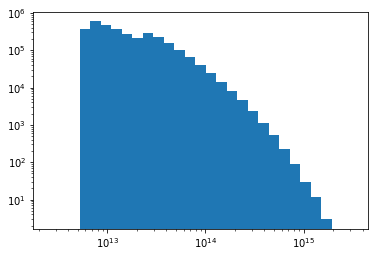

In [14]:
xbins = np.logspace(12.4,15.5,30)
_     = plt.hist(m200[centrals],bins=xbins)
plt.xscale('log')
plt.yscale('log')

In [15]:
centrals.size

509884913

In [16]:
hid = master['catalog/gold/haloid'][:]

In [17]:
hidu, index, counts = np.unique(hid[centrals],return_index=True,return_counts=True)

In [18]:
counts

array([506636113,         1,         1, ...,         1,         1,
               1])

In [20]:
counts[(counts>1)]

array([506636113,         2,         2, ...,         2,         2,
               2])

In [21]:
rax  = ra[centrals][index]
decx = dec[centrals][index]

m2x  = m200[centrals][index]
r2x  = r200[centrals][index]

cdx  = cid[centrals][index]
rhx  = rhalo[centrals][index]

In [22]:
## check if our index return only the centrals
rhx

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [23]:
nrepeated = counts[(counts>1)&(m2x>1e12)].size
nhalos    = counts[(m2x>1e12)].size

print('percentage of repeated halos: %.2f %%'%(100.*nrepeated/nhalos))

percentage of repeated halos: 0.96 %


In [24]:
nrepeated

30835

## Selecting Clusters

In [25]:
print('Number of halos %.3e'%nhalos)

Number of halos 3.218e+06


In [26]:
mask = (counts<2)&(m2x>1e12)

m200_range = [np.min(m2x[mask]),np.max(m2x[mask])]
print('Min Halo Mass %.3e solar mass'%m200_range[0])
print('Max Halo Mass %.3e solar mass'%m200_range[1])

Min Halo Mass 6.010e+12 solar mass
Max Halo Mass 1.753e+15 solar mass


In [27]:
## eu preciso ra, dec, z, m200, r200

cat = Table([hidu[mask],cdx[mask],rax[mask],decx[mask],m2x[mask],r2x[mask]],
            names=['haloid','coadd_object_id','RA','DEC','M200','R200'])

In [28]:
## check the haloid uniqueness
np.unique(cat['haloid']).size-len(cat)

0

Text(0.5,0,'M200')

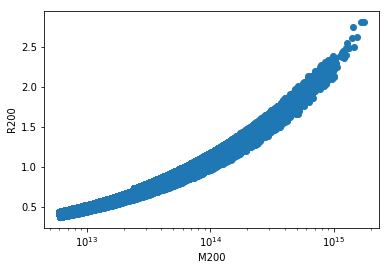

In [29]:
## checking plot

plt.scatter(cat['M200'],cat['R200'])
plt.xscale('log')
plt.ylabel('R200')
plt.xlabel('M200')

## Get the redshift

In [30]:
fname  = path+'Buzzard_v2.0_Y3a_bpz.h5'
bpz    = h5py.File(fname)

In [31]:
bpz['catalog/bpz'].keys()

[u'coadd_object_id', u'redshift_cos', u'z', u'zmc_sof', u'zmean_sof']

In [32]:
bcid = bpz['catalog/bpz/coadd_object_id'][:]
cid  = cat['coadd_object_id']

In [ ]:
%%timeit

select, = np.where(np.isin(bcid,cid,assume_unique=True))

In [ ]:
bcid_small = bcid[select]

z = bpz['catalog/bpz/z'][:]
z_small = z[select]

In [ ]:
w, = np.where(np.isin(cid,bcid_small,assume_unique=True))

cat['redshift'] = -1.*np.ones_like(cat['R200'])
cat['redshift'][w] = z_small